In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [4]:
data.shape

(2834, 6)

In [5]:
data.isnull().sum()/len(data)*100

id                 0.000000
url_legal         70.712773
license           70.712773
excerpt            0.000000
target             0.000000
standard_error     0.000000
dtype: float64

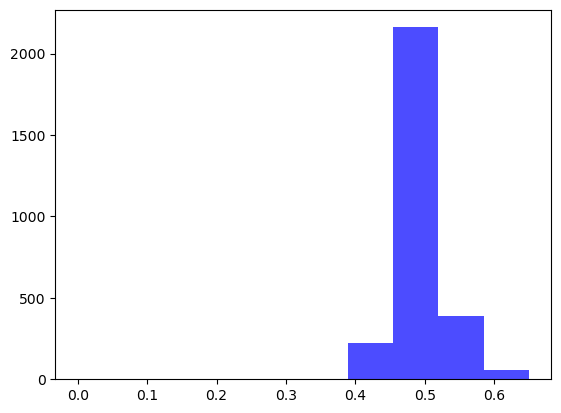

In [6]:
plt.hist(data.standard_error, bins=10, color='blue', alpha=0.7)
plt.show()

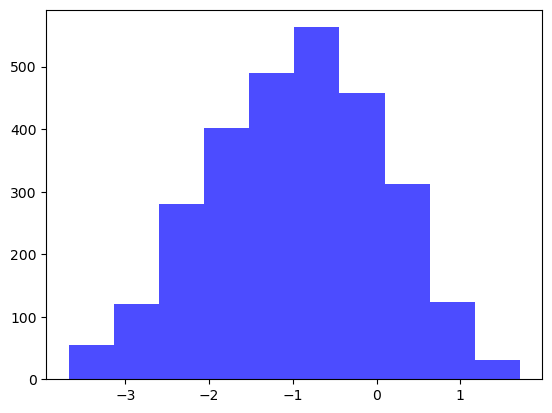

In [7]:
plt.hist(data.target, bins=10, color='blue', alpha=0.7)
plt.show()

In [8]:
data.standard_error.mean(),data.standard_error.var()

(0.49143509098976706, 0.0012122741911045414)

In [9]:
df1=data.drop(["id","url_legal","license","standard_error"],axis=1)

In [10]:
df1

,excerpt,target
0,When the young people returned to the ballroom...,-0.340259
1,"All through dinner time, Mrs. Fayre was somewh...",-0.315372
2,"As Roger had predicted, the snow departed as q...",-0.580118
3,And outside before the palace a great garden w...,-1.054013
4,Once upon a time there were Three Bears who li...,0.247197
...,...,...
2829,When you think of dinosaurs and where they liv...,1.711390
2830,So what is a solid? Solids are usually hard be...,0.189476
2831,The second state of matter we will discuss is ...,0.255209
2832,Solids are shapes that you can actually touch....,-0.215279


In [11]:
df1.excerpt[0]

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [77]:
from nltk import RegexpTokenizer
import spacy
import nltk
nlp=spacy.load("en_core_web_sm")
regex=r'[A-Za-z]+'
tokenizer=RegexpTokenizer(regex,gaps=False)
words = set(nltk.corpus.words.words())

In [98]:
def text_preprocess(text):
    text=" ".join([i.lower() for i in text.split(" ")])
    doc=nlp(text)
    t1=[i.lemma_ for i in doc if not(i.is_space or i.is_punct) if not i.is_stop]
    t1=(token for token in tokenizer.tokenize(" ".join(t1)) if token.lower() in words or not token.isalpha() )
    return(" ".join(t1))

In [99]:
text_preprocess(df1.excerpt[0])

'young people return ballroom present decidedly change appearance instead interior scene winter landscape floor cover snow white canvas lay smoothly rumple bump hillock like real snow field numerous palm evergreen decorate room powder flour strew tuft cotton like snow diamond dust lightly sprinkle glitter crystal icicle branch end room wall beautiful bear skin rug rug prize girl boy game girl gather end room boy end call north pole south pole player give small flag plant reach pole easy matter traveller oblige wear snowshoe'

In [100]:
df2=df1.copy()
df2["preprocessed_text"]=df2.excerpt.apply(text_preprocess)

In [101]:
df3=df2.drop("excerpt",axis=1)
df3.head()

,target,preprocessed_text
0,-0.340259,young people return ballroom present decidedly...
1,-0.315372,dinner time somewhat silent eye rest dolly wis...
2,-0.580118,roger predict snow depart quickly come day sle...
3,-1.054013,outside palace great garden wall round fill st...
4,0.247197,time bear live house wood little small wee bea...


In [102]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [103]:
df4=pd.DataFrame(vectorizer.fit_transform(df3.preprocessed_text).toarray(),columns=vectorizer.get_feature_names_out())

In [104]:
df4.head()

,aa,aback,abandon,abandonment,abate,abbey,abbot,abbreviate,abbreviation,abdomen,...,zone,zoo,zoological,zoologist,zoology,zoom,zooplankton,zoospore,zooxanthellae,zymology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X=df4
Y=df3.target

In [106]:
X

,aa,aback,abandon,abandonment,abate,abbey,abbot,abbreviate,abbreviation,abdomen,...,zone,zoo,zoological,zoologist,zoology,zoom,zooplankton,zoospore,zooxanthellae,zymology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
Y

0      -0.340259
1      -0.315372
2      -0.580118
3      -1.054013
4       0.247197
          ...   
2829    1.711390
2830    0.189476
2831    0.255209
2832   -0.215279
2833    0.300779
Name: target, Length: 2834, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=42)

In [110]:
x_train

,aa,aback,abandon,abandonment,abate,abbey,abbot,abbreviate,abbreviation,abdomen,...,zone,zoo,zoological,zoologist,zoology,zoom,zooplankton,zoospore,zooxanthellae,zymology
2743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
from sklearn.svm import SVR
reg=SVR()

In [112]:
reg.fit(x_train,y_train)

SVR()

In [113]:
reg.score(x_test,y_test)

0.43053615891803065